In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df=pd.read_csv("C:\\Users\\Administrator\\Downloads\\Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


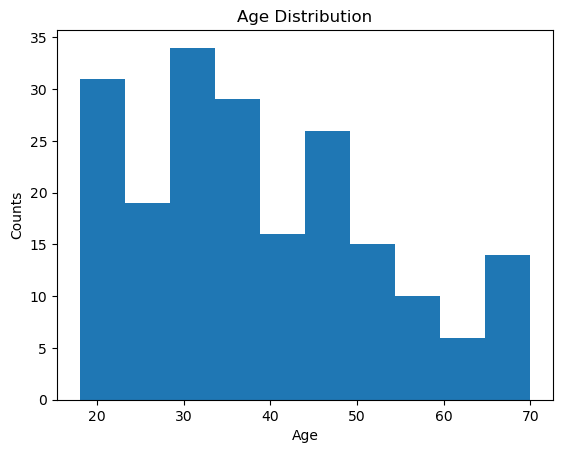

In [9]:
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Age Distribution')
plt.show()

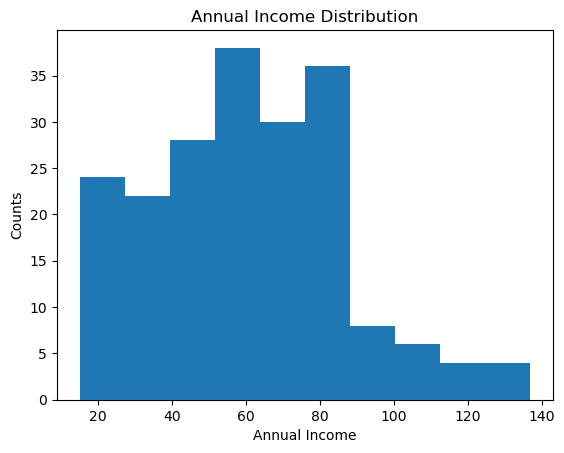

In [10]:
plt.hist(df['Annual Income (k$)'])
plt.xlabel('Annual Income')
plt.ylabel('Counts')
plt.title('Annual Income Distribution')
plt.show()

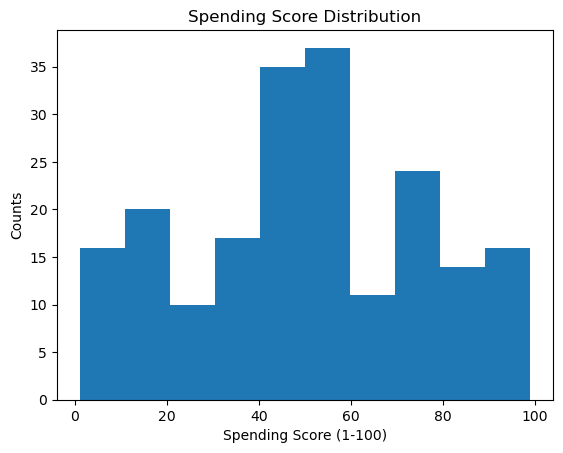

In [11]:
plt.hist(df['Spending Score (1-100)'])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Counts')
plt.title('Spending Score Distribution')
plt.show()

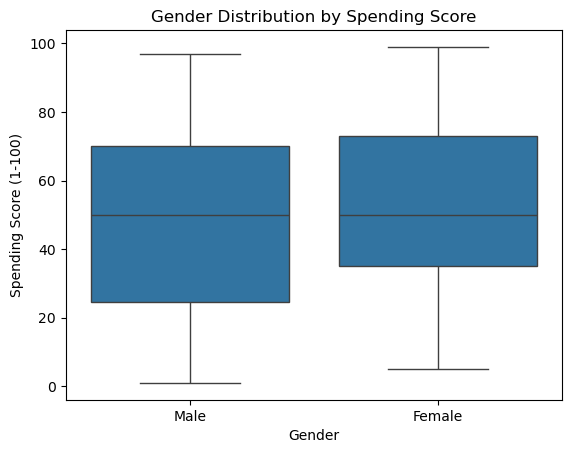

In [12]:
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.title('Gender Distribution by Spending Score')
plt.show()

In [13]:
clustering_features=df[['Annual Income (k$)', 'Spending Score (1-100)']]
clustering_features.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


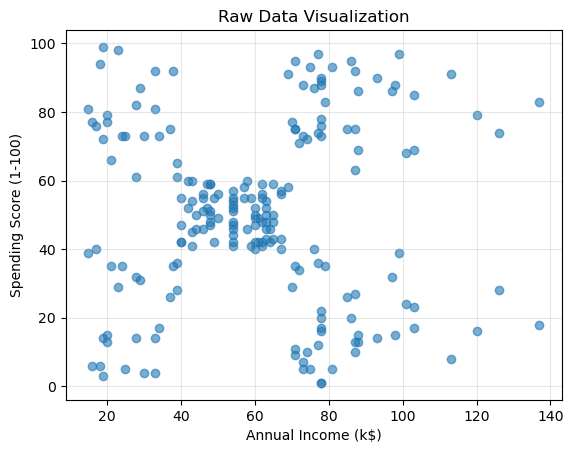

In [14]:
plt.scatter(clustering_features['Annual Income (k$)'], clustering_features['Spending Score (1-100)'], alpha=0.6)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Raw Data Visualization')
plt.grid(True, alpha=0.3)
plt.show()

In [15]:
k_range = range(2,10)
empty_inertias = []
for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10)
    kmeans.fit(clustering_features)
    empty_inertias.append(kmeans.inertia_)
    print(f'k = {k}: Inertia = {kmeans.inertia_:.2f}')

k = 2: Inertia = 181363.60
k = 3: Inertia = 106348.37
k = 4: Inertia = 73679.79
k = 5: Inertia = 44448.46
k = 6: Inertia = 37233.81
k = 7: Inertia = 30241.34
k = 8: Inertia = 25036.42
k = 9: Inertia = 21916.79


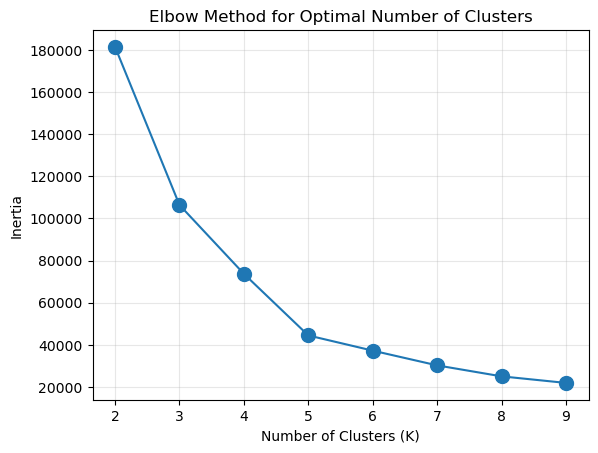

In [16]:
plt.plot(k_range, empty_inertias, 'o-', markersize=10)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True, alpha=0.3)
plt.show()

In [18]:
silhouette_scores=[]
k_range = range(2,10)
empty_inertias = []
for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10)
    cluster_labels=kmeans.fit_predict(clustering_features)
    
    silhouette_avg=silhouette_score(clustering_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'k={k}: Silhoutte Score={silhouette_avg:.3f}')

k=2: Silhoutte Score=0.297
k=3: Silhoutte Score=0.468
k=4: Silhoutte Score=0.493
k=5: Silhoutte Score=0.554
k=6: Silhoutte Score=0.540
k=7: Silhoutte Score=0.529
k=8: Silhoutte Score=0.455
k=9: Silhoutte Score=0.456


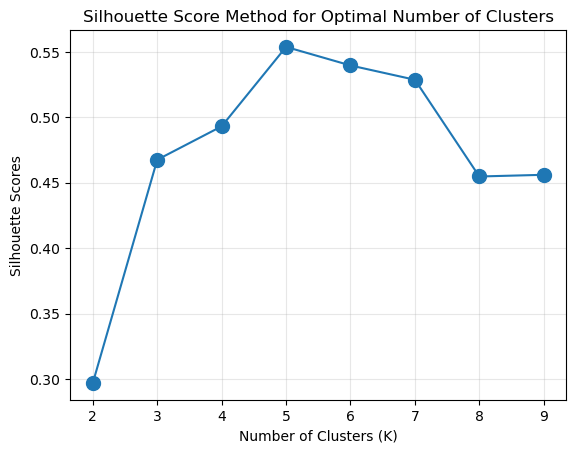

In [21]:
plt.plot(k_range, silhouette_scores, 'o-', markersize=10)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Score Method for Optimal Number of Clusters')
plt.grid(True, alpha=0.3)
plt.show()

In [22]:
final_kmeans=KMeans(n_clusters=5, random_state=42, n_init=10)
cluster_labels=final_kmeans.fit_predict(clustering_features)

In [23]:
cluster_labels[:10]

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2], dtype=int32)

In [24]:
df_clustered=df.copy()
df_clustered['predicted_cluster']= cluster_labels

In [25]:
df_clustered['predicted_cluster'].unique()
df_clustered.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),predicted_cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
5,6,Female,22,17,76,2
6,7,Female,35,18,6,4
7,8,Female,23,18,94,2
8,9,Male,64,19,3,4
9,10,Female,30,19,72,2


In [27]:
cluster_counts=pd.Series(cluster_labels).value_counts()
print(cluster_counts)

0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


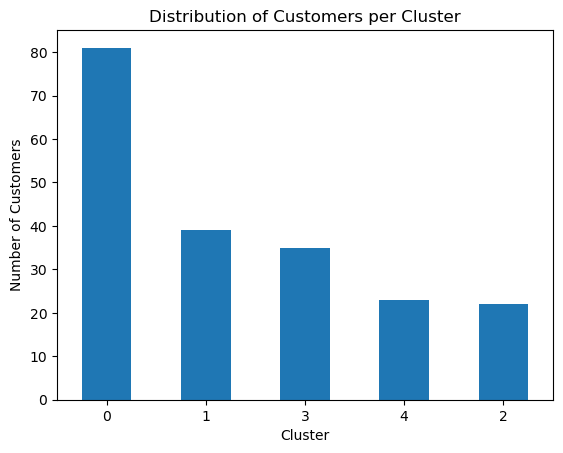

In [29]:
cluster_counts.plot(kind = 'bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers per Cluster')
plt.xticks(rotation = 0)
plt.show()

In [30]:
cluster_characteristics = df_clustered.groupby('predicted_cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
display(cluster_characteristics)

,Annual Income (k$),Spending Score (1-100)
predicted_cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


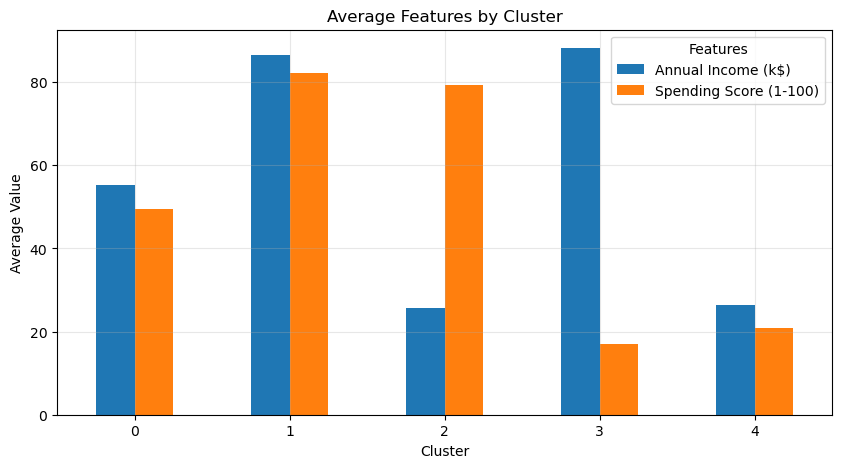

In [31]:
fig,axes = plt.subplots(figsize=(10,5))
cluster_characteristics.plot(kind='bar', ax=axes)
axes.set_xlabel('Cluster')
axes.set_ylabel('Average Value')
axes.set_title('Average Features by Cluster')
axes.tick_params(axis='x', rotation=0)
axes.legend(title='Features')
axes.grid(True, alpha=0.3)
plt.show()

In [32]:
"""
Cluster 0= Average income, average spenders
Cluster 1= High income, high spenders
Cluster 2= Low income, high spenders
Cluster 3= High income, low spenders
Cluster 4= Low income, low spenders
"""

'\nCluster 0= Average income, average spenders\nCluster 1= High income, high spenders\nCluster 2= Low income, high spenders\nCluster 3= High income, low spenders\nCluster 4= Low income, low spenders\n'